In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pathlib
from tqdm import tqdm

from Utils import *


# Compute Minimum Colony Size
Approximate the minimum colony size by considering the outliers on multiple plates

In [4]:
folder_to_plates = r"C:\Users\Hannah\Documents\Hefekulturen\Daten\Data_May_2023/"

paths_plates = [str(item) for item in pathlib.Path(folder_to_plates).rglob("*") if (not item.is_dir())]
print("Try to approximate sizes by "+str(len(paths_plates))+" plates")


sizes = []
i = 0
for p in tqdm(paths_plates): 
    plate = open_image(p)
    if("A" in pathlib.Path(p).stem):
        x_expected = 48 
        y_expected = 32 
    elif("B" in pathlib.Path(p).stem):
        x_expected = 48 
        y_expected = 32 
    elif("C" in pathlib.Path(p).stem):
        x_expected = 48 
        y_expected = 28 
    rgb_grid, plate_sizes, x_start, x_end, y_start, y_end = compute_grid(plate, x_expected, y_expected, use_hard_grid= False)
    if(not np.any(rgb_grid == None)):
        sizes.extend(plate_sizes.reshape(-1))
        i += 1

print("Approximated size by "+str(i)+" plates")


Try to approximate sizes by 34 plates


 24%|██▎       | 8/34 [00:10<00:34,  1.33s/it]

47
47
47 48


 35%|███▌      | 12/34 [00:15<00:29,  1.33s/it]

49
48


 47%|████▋     | 16/34 [00:21<00:23,  1.32s/it]

49
48


 53%|█████▎    | 18/34 [00:23<00:21,  1.32s/it]

47
47
47 48


 71%|███████   | 24/34 [00:31<00:13,  1.33s/it]

47
47
47 48


100%|██████████| 34/34 [00:44<00:00,  1.32s/it]

Approximated size by 34 plates


In [6]:

sizes = np.array(sizes)

percentile_75 = np.percentile(sizes, 75)
percentile_25 = np.percentile(sizes, 25)
iqr = percentile_75 - percentile_25
max_outlier = percentile_75+1.5*iqr
min_colonly = percentile_25-1*iqr

if(min_colonly < 0):
    min_colonly = np.percentile(sizes, 3)

# print("Minimum colony size based on outlier= "+str(min_outlier))
print("Recommended Minimum colony size = "+str(min_colonly))


Recommended Minimum colony size = 85.0


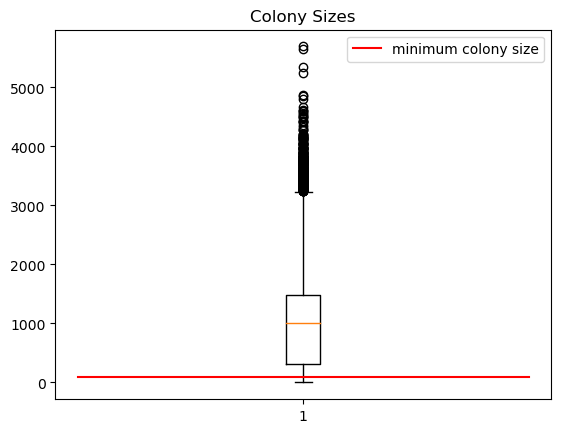

In [7]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Colony Sizes')
ax1.boxplot(sizes);
ax1.plot([0,1,2],[min_colonly,min_colonly,min_colonly], c = "r", label="minimum colony size")
plt.legend()
plt.show()